# Task-1: Applying FFT on 2D Image


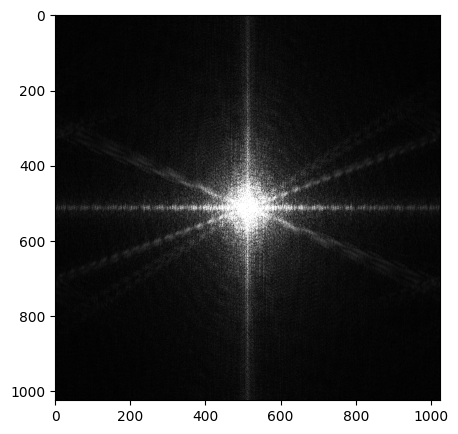

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import skimage as ski
from skimage import io, color, exposure, img_as_float

# Load grayscale image Bracu.png and convert it to grayscale
image = io.imread("BracU.png")
image = color.rgb2gray(image)



def perform_fft2(x, M, N):
    X = np.fft.fft2(x)
    X = np.fft.fftshift(X)
    X = X / (N * M)

    u = np.fft.fftshift(np.fft.fftfreq(M))
    v = np.fft.fftshift(np.fft.fftfreq(N))
    u, v = np.meshgrid(u, v)

    return X, u, v
# --- Perform FFT on the image ---
rows, cols = image.shape

X, u, v = perform_fft2(image,rows,cols)

plt.figure(figsize=(5,5))
plt.imshow(np.log(np.abs(X)+1), cmap='gray', vmin=0, vmax=np.percentile(np.log(np.abs(X)+1), 99))


# Lab Task 2: Low-pass and High-pass Filtering in the Frequency Domain


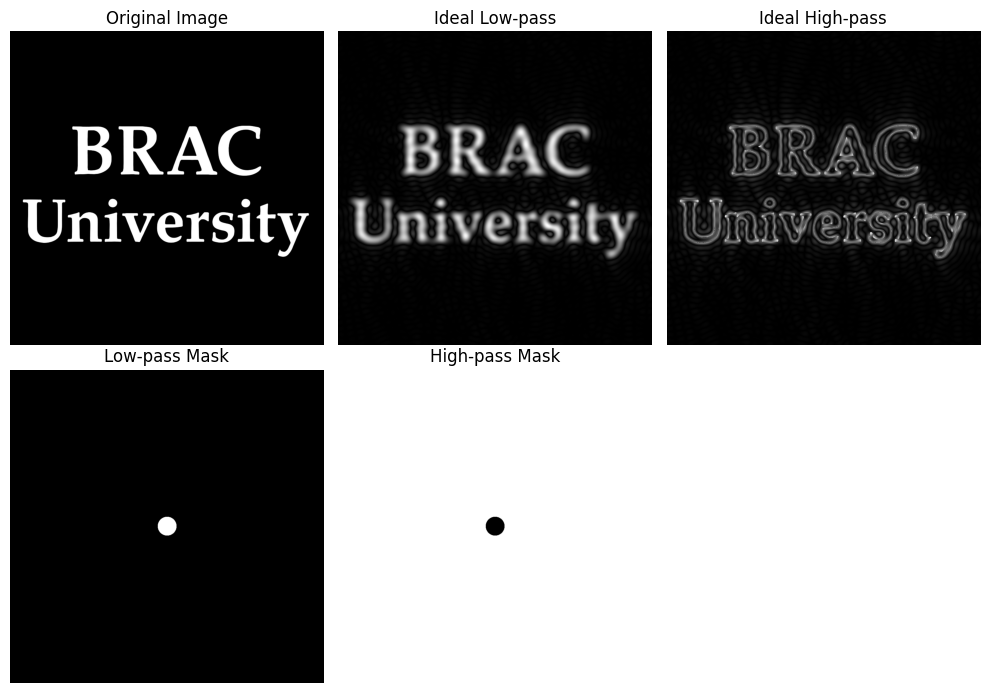

In [11]:
# Compute radial frequency grid
D = np.sqrt(u**2 + v**2)

cut_off = 0.03



# Apply filters
def apply_filter(H, X):
    filtered = X * H
    return np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

# Define a low pass and a high pass filter withe the given cut_off
H_lp = D <= cut_off

H_hp = D > cut_off


# Apply filter and reconstruct the filtered images
img_lp = apply_filter(H_lp, X)
img_hp = apply_filter(H_hp, X)

plt.figure(figsize=(10, 7))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_lp, cmap='gray')
plt.title("Ideal Low-pass")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_hp, cmap='gray')
plt.title("Ideal High-pass")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(H_lp, cmap='gray')
plt.title("Low-pass Mask")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(H_hp, cmap='gray')
plt.title("High-pass Mask")
plt.axis('off')

plt.tight_layout()
plt.show()
